# Alternative Eurovision 2023 scoring systems

The [Eurovision Song Contest](https://eurovision.tv/) is an annual song competition between countries in Europe (and sometimes others). The scoring system has changed numerous times throughout the years and is always a hot topic for debate. In the [2023 edition](https://eurovision.tv/event/liverpool-2023), the scoring is given out by both a jury and the public. The public favorite, Cha Cha Cha by Finland's Käärija, only placed second overall behind the jury favorite, Tattoo by Sweden's Loreen, sparking a debate whether the votes of the jury, which only consists of five people from each country, should be weighted the same as the public vote. People have also pointed out other issue with the voting system, such as ally countries voting for each other and songs with a medium number of votes from every country not receiving many points. I want to explore some alternative scoring systems to see their effects on the results.

## The actual scoring system

In 2023, the points in the grand final came from two sources: the jury and the public televote. Each country in the contest, even if it did not qualify for the grand final, participates in the voting. No country is allowed to vote for itself. As a result, the jury and the public televote of each country has separate top 10 songs based on the voting. From each group, the jury and the public televote, 12 points are awarded to the top song, 10 to the second favorite, and then 1-8 points to the 10th-3rd favorites. For the first time in Eurovision history, the rest of the world has the opportunity to participate in the public televote only, assigning 1-8, 10, and 12 points to the top 10 favorites of the rest of the world. 

## Data collection

The 2023 scoring data was taken from [here](https://eurovisionworld.com/eurovision/2023). We will check a few sums to ensure the validity of the data.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive = False)

<IPython.core.display.Javascript object>

In [2]:
# read the data
df_total = pd.read_excel('Eurovision voting.xlsx', index_col = 1)
df_jury = pd.read_excel('Eurovision voting.xlsx', 1, index_col = 1)
df_tele = pd.read_excel('Eurovision voting.xlsx', 2, index_col = 1)

# put the data together
df_total = df_total.iloc[:,1:]
df_total.rename(columns = {df_total.columns[0]: 'Points'}, inplace = True)

df_jury = df_jury.iloc[:,1:]
df_jury.rename(columns = {df_jury.columns[0]: 'Points'}, inplace = True)
df_jury.columns = [country + ' (jury)' for country in df_jury.columns]

df_tele = df_tele.iloc[:,1:]
df_tele.rename(columns = {df_tele.columns[0]: 'Points'}, inplace = True)
df_tele.columns = [country + ' (tele)' for country in df_tele.columns]

df = pd.concat([df_total, df_jury, df_tele], axis = 1)
df = df.fillna(0)

new_index = ['Points', 'Points (jury)', 'Points (tele)']
new_index += list(df_total.columns[1:]) 
new_index += list(df_jury.columns[1:]) 
new_index += list(df_tele.columns[1:])
df = df.reindex(new_index, axis = 1)
df = df.astype('int')

In [3]:
# preview the data
show(df, lengthMenu = [10, 26])

In [4]:
# check the jury and televote totals add up to the grand total
df.loc[:,'Points (jury)'] + df.loc[:,'Points (tele)'] == df.loc[:,'Points']

Sweden            True
Finland           True
Israel            True
Italy             True
Norway            True
Ukraine           True
Belgium           True
Estonia           True
Australia         True
Czechia           True
Lithuania         True
Cyprus            True
Croatia           True
Armenia           True
Austria           True
France            True
Spain             True
Moldova           True
Poland            True
Switzerland       True
Slovenia          True
Albania           True
Portugal          True
Serbia            True
United Kingdom    True
Germany           True
dtype: bool

In [5]:
# check the jury and televote points add up to the total points
# from each country
num_countries = 37
countries = df.columns[3:3 + num_countries]
check = []
for country in countries:
    check.append(all(df.loc[:, country + ' (jury)'] + 
                     df.loc[:, country + ' (tele)'] == 
                     df.loc[:, country]))
print(pd.Series(check, index = countries))

Albania           True
Armenia           True
Australia         True
Austria           True
Azerbaijan        True
Belgium           True
Croatia           True
Cyprus            True
Czechia           True
Denmark           True
Estonia           True
Finland           True
France            True
Georgia           True
Germany           True
Greece            True
Iceland           True
Ireland           True
Israel            True
Italy             True
Latvia            True
Lithuania         True
Malta             True
Moldova           True
Netherlands       True
Norway            True
Poland            True
Portugal          True
Romania           True
San Marino        True
Serbia            True
Slovenia          True
Spain             True
Sweden            True
Switzerland       True
Ukraine           True
United Kingdom    True
dtype: bool


In [6]:
# check the total points are correct
df['Points'] == df.iloc[:,3:3+num_countries+1].sum(axis = 1)

Sweden            True
Finland           True
Israel            True
Italy             True
Norway            True
Ukraine           True
Belgium           True
Estonia           True
Australia         True
Czechia           True
Lithuania         True
Cyprus            True
Croatia           True
Armenia           True
Austria           True
France            True
Spain             True
Moldova           True
Poland            True
Switzerland       True
Slovenia          True
Albania           True
Portugal          True
Serbia            True
United Kingdom    True
Germany           True
dtype: bool

## Alternative scoring systems

I want to address various opinions on the Eurovision scoring system by creating alternative scoring systems and seeing their effects on the results. Some opinions on the scoring system include the following.
- The first place entry for a country's jury or televote does not receive that many more points than the second place entry. 
- It is unfair that some countries are in bigger voting blocs that generally vote for each other.
- The winning entry should be liked by both the jury and the public.

### Alternative point scales

Within a country's jury or televotes, the first place entry receives 12 points while the second place entry receives 10 points. As a result, no matter how much more a country likes the first place entry over the second place entry, the two entries still receive a similar number of points. In 2023, Sweden, the winner, received 12 points from the jury of 15 countries and no 12 points from the televote. However, Finland, the runner-up, received 12 points from the jury of 2 countries and the televote of 18 countries. It could seem strange that an entry that is not the most liked by the public of any country ends up winning, but the current system makes this scenario very possible. 

In order to address this opinion, I change the current system of 1-8, 10, 12 points into a quadratic and a cubic scale. The scales are normalized so that the first place entry still receives 12 points. 

In [7]:
# show the alternative point scales
scales = pd.DataFrame({'original': [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]}, ['#{}'.format(n+1) for n in range(10)])
scales['quadratic'] = scales['original']**2/12
scales['cubic'] = scales['original']**3/12**2

show(scales)

Now I calculate the scores using these alternative point scales. The countries in green had their ranks improved from their actual ranks, whereas the countries in red ranked worse.  

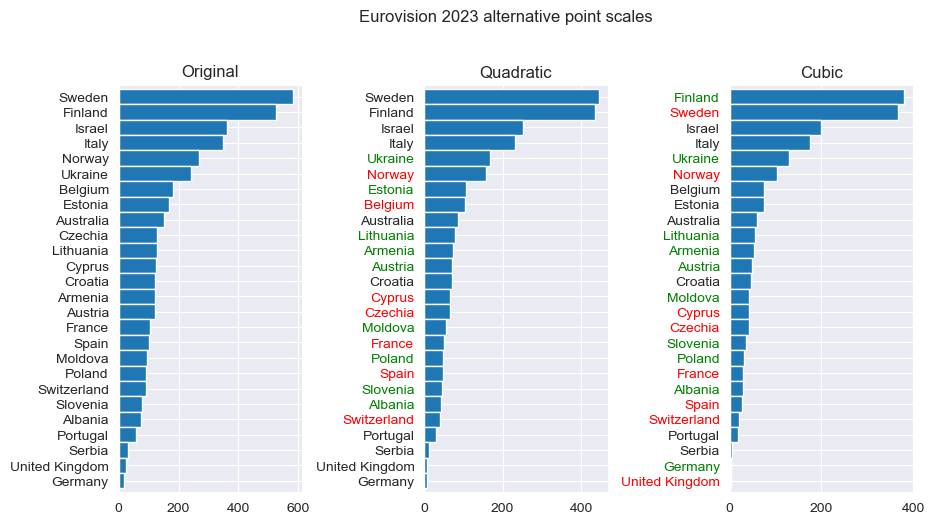

In [8]:
# calulate scoring using alternative scales
df_alt_scales = pd.DataFrame({'original' : df['Points']})
df_alt_scales['quadratic'] = ((df.iloc[:,3+num_countries+1:] ** 2)/12).sum(axis = 1)
df_alt_scales['cubic'] = ((df.iloc[:,3+num_countries+1:] ** 3)/12**2).sum(axis = 1)

# get ranks for the alternative scoring systems
df_alt_scales_ranks = df_alt_scales.rank(ascending = False, method = 'min')
df_alt_scales_ranks['quadratic_change'] = df_alt_scales_ranks['original'] - df_alt_scales_ranks['quadratic'] 
df_alt_scales_ranks['cubic_change'] = df_alt_scales_ranks['original'] - df_alt_scales_ranks['cubic'] 
df_alt_scales_ranks = df_alt_scales_ranks.astype('int')
df_alt_scales_ranks = df_alt_scales_ranks.sort_values('cubic_change', ascending = False)

# show alternative scores
fig, axes = plt.subplots(1, 3, figsize = (10,6))
fig.tight_layout(pad=6.0)
fig.suptitle('Eurovision 2023 alternative point scales')

df_alt_scales = df_alt_scales.sort_values('original', ascending = False)
ax = df_alt_scales.plot.barh(title = 'Original', y = 'original', 
                             ax = axes[0], legend = False, width = 1)
ax.invert_yaxis()

df_alt_scales = df_alt_scales.sort_values('quadratic', ascending = False)
ax = df_alt_scales.plot.barh(title = 'Quadratic', y = 'quadratic', 
                             ax = axes[1], legend = False, width = 1)
ax.invert_yaxis()
labels = ax.get_yticklabels()
num_labels = len(labels)
for i in range(num_labels):
    country = labels[i].get_text()
    quadratic_change = df_alt_scales_ranks.loc[country]['quadratic_change']
    if quadratic_change > 0:
        labels[i].set_color('g')
    elif quadratic_change < 0:
        labels[i].set_color('r')

df_alt_scales = df_alt_scales.sort_values('cubic', ascending = False)
ax = df_alt_scales.plot.barh(title = 'Cubic', y = 'cubic', 
                             ax = axes[2], legend = False, width = 1)
ax.invert_yaxis()
labels = ax.get_yticklabels()
num_labels = len(labels)
for i in range(num_labels):
    country = labels[i].get_text()
    cubic_change = df_alt_scales_ranks.loc[country]['cubic_change']
    if cubic_change > 0:
        labels[i].set_color('g')
    elif cubic_change < 0:
        labels[i].set_color('r')
    

Couple of observations here. Even though Finland received more sets of 12 points than Sweden, a quadratic scale isn't enough for Finland to overtake Sweden. However, a cubic scale allows Finland to win over Sweden. Also, all of the countries whose rank dropped in the quadratic scale, with the exception of Belgium, also had their rank dropped in the cubic scale. This possibly indicates that these countries received a lot of small number of points in the actual scoring system, which is valued even less in the quadratic and cubic scales.

Lastly, here are the changes in ranks using these alternative point scales. 

In [9]:
# show alternative ranks
show(df_alt_scales_ranks, lengthMenu = [26])

### Mitigating the effects of voting blocs

Some believe that voting at Eurovision, whether conscious or subconscious, is influenced by external factors and not by the performances alone. Geographical regions, language, religion, and politics have been identified as possible external factors influencing the votes. This can lead to certain pairs or groups of countries voting for each other. The following alternative scoring system is an attempt to filter out this phenomena. 

In this alternative scoring system, points given to each other do not count. For example, Finland's televote gave Estonia 6 points and Estonia's televote gave Finland 12 points. This alternative system would give 0 points to Estonia from Finland and 6 points to Finland from Estonia. In general, if country A's televote gives country B $P_{A,B}$ points and country B's televote gives country A $P_{B,A}$ points, then under this alternative system, country A would receive $P_{B,A} - \min\{P_{A,B}, P_{B,A}\}$ points from country B and country B would receive $P_{A,B} - \min\{P_{A,B}, P_{B,A}\}$ points from country A. The same procedure happens with the jury points as well. If a country is not participating in the final, then I consider it as receiving 0 points from each country's jury and televote.

Here are the results of implementing this scoring system. Again, we put countries in green if their rank improved and red if their rank went down. 

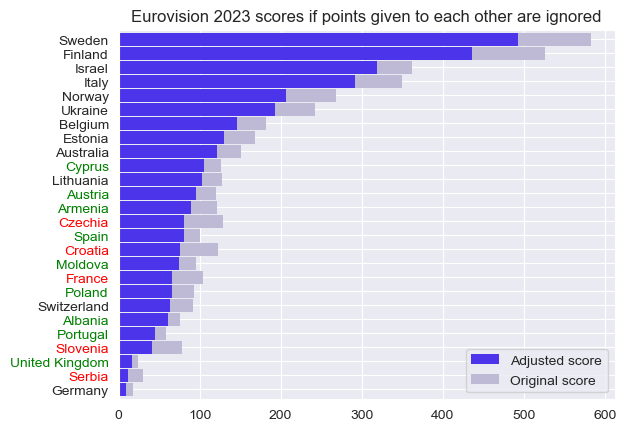

In [10]:
# show results of alternative scoring system 
# where mutual voting is cancelled
final_countries = df.index
voters = df.columns[4+num_countries:]
totals = []

for country in final_countries:
    country_points = 0
    for voter in voters:
        voter_country = voter[:-7]
        voter_type = voter[-7:]
        if voter_country in final_countries:
            receive = df.loc[country, voter]
            give = df.loc[voter_country, country + voter_type]
            country_points += (receive - min(receive, give))
        else:
            country_points += df.loc[country, voter]
    totals.append(country_points)

df_cancel = pd.DataFrame(totals, index = final_countries)
df_cancel['original'] = df['Points']
df_cancel = pd.concat([df_cancel, df_cancel.rank(ascending = False, method = 'min')], axis = 1)
df_cancel.columns = ['new', 'original', 'new_rank', 'original_rank']
df_cancel['rank_change'] = df_cancel['original_rank'] - df_cancel['new_rank']
df_cancel['change'] = df_cancel['original'] - df_cancel['new']
df_cancel['pct_change'] = -100 * df_cancel['change']/df_cancel['original']
df_cancel = df_cancel.sort_values('new', ascending = False)

ax = df_cancel.plot.barh(y = ['new', 'change'], width = 0.9, 
                         stacked = True, color = ['#4c34eb', '#bebad6'], edgecolor = 'None')
ax.legend(['Adjusted score', 'Original score'])
ax.set_title('Eurovision 2023 scores if points given to each other are ignored')
ax.invert_yaxis()

# change country label colors
labels = ax.get_yticklabels()
num_labels = len(labels)
for i in range(num_labels):
    country = labels[i].get_text()
    rank_change = df_cancel.loc[country]['rank_change']
    if rank_change > 0:
        labels[i].set_color('g')
    elif rank_change < 0:
        labels[i].set_color('r')

Interestingly enough, the top 9 spots remain unchanged after canceling out the mutual votes. From this information, it seems like mutual voting was not much of an issue at Eurovision in 2023, at least for the top songs. Here's a more detailed table of the adjusted results. 

In [11]:
show(df_cancel, lengthMenu = [26])

Let's also visualize the countries that were affected by the adjustments in terms off number of ranks they have gone up or down.

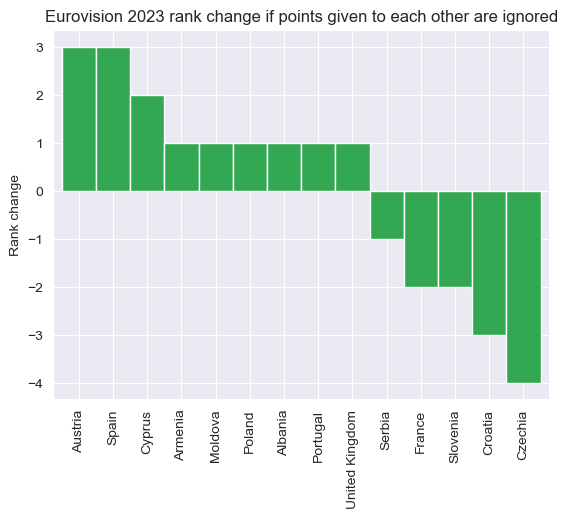

In [12]:
df_cancel_rank_change = df_cancel[df_cancel['rank_change'] != 0]['rank_change']
df_cancel_rank_change = df_cancel_rank_change.sort_values(ascending = False)
ax = df_cancel_rank_change.plot.bar(width = 1, ylabel = 'Rank change',
                                    title = 'Eurovision 2023 rank change ' +
                                    'if points given to each other are ignored',
                                    color = '#32a852')

Overall, the rankings do not get shaken up very much after the adjustment. The biggest absolute change in ranks is 4 ranks for Czechia. 

One flaw about this alternative scoring system is that if it were to be actually implemented, the voters being aware of this system could affect how the voters vote. Another consideration is that countries that are not in the grand final have more voting power as their points cannot be canceled out. 

### Agreement between the jury and the televote

Some argue that the jury's points and the televote points being weighed the same is unfair, since the jury for each country consists of only 5 people. Since the jury is such a small group of people, the individual musical tastes of the jury could be heavily reflected in the jury points and as a result, heavily swaying the overall results one way or another. There have been investigations into changing the weighting between the jury vote and the televote, such as [this one](https://escinsight.com/2023/05/22/eurovision-song-contest-change-jury-televote-percentate-loreen-kaarija/). However, I want to see what would happen if the entries were scored based off of how much the jury and the televote agree.

For example, in 2023, Italy received 12 points from Austria's jury but only 8 points from Austria's televote, so in this adjusted scoring system, Italy would only receive 8 points from both the Austrian jury and the Austrian public. In general, this system gives the minimum of the jury points and the televote points from a particular country's jury and televote to another particular country. Since the rest of the world only have televotes and no jury, the points from the rest of the world is unaffected. 

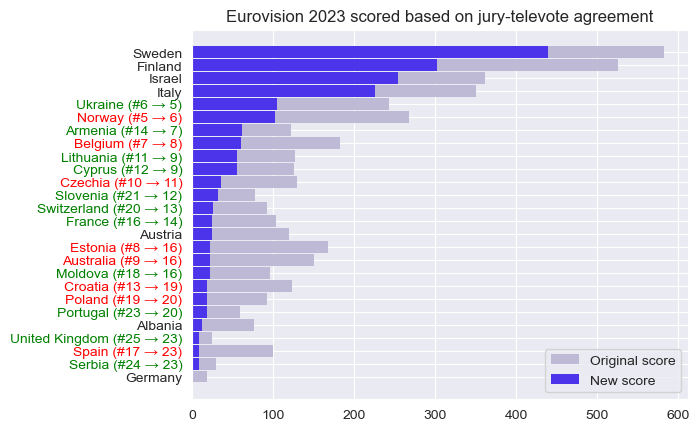

In [13]:
# show scoring based on the jury-televote agreement system
final_countries = df.index
voting_countries = df.columns[3:3+num_countries]
totals = []

for country in final_countries:
    country_points = 0
    for voter in voting_countries:
        j_pts = df.loc[country, voter + ' (jury)']
        t_pts = df.loc[country, voter + ' (tele)']
        country_points += 2*min(j_pts, t_pts)
    country_points += df.loc[country, 'Rest of the World']
    totals.append(country_points)
    
df_agree = pd.DataFrame(totals, index = final_countries)
df_agree['original'] = df['Points']
df_agree = pd.concat([df_agree, df_agree.rank(ascending = False, method = 'min')], axis = 1)
df_agree.columns = ['new', 'original', 'new_rank', 'original_rank']
df_agree['rank_change'] = df_agree['original_rank'] - df_agree['new_rank']
df_agree['change'] = df_agree['original'] - df_agree['new']
df_agree = df_agree.astype('int')
df_agree['pct_change'] = -100 * df_agree['change']/df_agree['original']
df_agree = df_agree.sort_values('new', ascending = False)

fig, ax = plt.subplots()
ax.set_title('Eurovision 2023 scored based on jury-televote agreement')
ax.invert_yaxis()
ax.barh(df_agree.index, df_agree['original'], height = 0.9, color = '#bebad6', edgecolor = 'None')
ax.barh(df_agree.index, df_agree['new'], height = 0.9, color = '#4c34eb', edgecolor = 'None')
ax.legend(['Original score', 'New score'])

# change country label text and colors
labels = ax.get_yticklabels()
num_labels = len(labels)
for i in range(num_labels):
    country = labels[i].get_text()
    rank_change = df_agree.loc[country]['rank_change']
    if rank_change > 0:
        labels[i].set_color('g')
        labels[i].set_text('{} (#{} → {})'.format(country, 
                                                  df_agree['original_rank'][country], 
                                                  df_agree['new_rank'][country]))
    elif rank_change < 0:
        labels[i].set_color('r')
        labels[i].set_text('{} (#{} → {})'.format(country, 
                                                  df_agree['original_rank'][country], 
                                                  df_agree['new_rank'][country],))
ax.set_yticks(ax.get_yticks(), labels)
plt.show()

While this alternative scoring system changes around the placements a lot, the top 4 spots remain the same. In fact, there is now a noticeable difference between the top 4 spots and the remaining entries. This shows that the top 4 songs are liked by both the jury and the public. The changes in ranks for the remaining songs reflect a disagreement between the jury and the public about some of these songs. 

The following is a more detailed table about the scores under this scoring system.

In [14]:
show(df_agree, lengthMenu = [26])

## Conclusion

Each alternative scoring system changes the placements around. However, the top songs remained relatively stable under each of the alternative scoring systems considered. This means while each system has its own philosophy about which songs should be deemed better, we could broadly say that the songs that perform well in each system are generally good songs. 

One thing to keep in mind is that the current scoring system is set before the contest and scoring the results using an alternative system after the fact is arguably unfair because the artists are not competing with these alternative systems in mind. Changing how the points are calculated can very well change how voters vote and perhaps even what kind of performances we see in the contest. 

At the end of the day, we all have our own personal preferences when it comes to music. Which entries we like might not be reflected in any alternative scoring system. 